In [1]:
import jax, jax.numpy as jnp
import flax.linen as nn
import optax
import matplotlib.pyplot as plt

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!


W0000 00:00:1728430106.320320 1243438 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1728430106.329987 1243438 service.cc:145] XLA service 0x167d47f40 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728430106.330000 1243438 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1728430106.331120 1243438 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1728430106.331130 1243438 mps_client.cc:384] XLA backend will use up to 11452858368 bytes on device 0 for SimpleAllocator.


Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

{'params': {'linear': {'kernel': Array([[-0.4583346]], dtype=float32), 'bias': Array([0.], dtype=float32)}}}
{'params': {'linear': {'bias': (1,), 'kernel': (1, 1)}}}
25.982885 [[0.4250779]] [0.48237714]
16.881504 [[1.1309037]] [0.8630659]
11.103857 [[1.6948696]] [1.1634518]
7.4357553 [[2.1455097]] [1.4004326]
5.106697 [[2.505614]] [1.587358]
3.627697 [[2.7933862]] [1.7347734]
2.6883929 [[3.0233667]] [1.8510076]
2.0917761 [[3.207171]] [1.9426378]
1.7127776 [[3.3540778]] [2.0148573]
1.4719912 [[3.4715]] [2.0717661]
1.3189948 [[3.56536]] [2.1166003]
1.2217678 [[3.64039]] [2.1519136]
1.1599737 [[3.7003703]] [2.1797216]
1.120694 [[3.7483225]] [2.2016141]
1.0957224 [[3.7866604]] [2.2188451]
1.0798451 [[3.8173134]] [2.2324038]
1.0697482 [[3.841823]] [2.2430696]
1.0633266 [[3.8614218]] [2.2514577]
1.0592419 [[3.8770945]] [2.2580526]
1.056643 [[3.8896282]] [2.263236]
1.0549896 [[3.899652]] [2.2673087]
1.0539373 [[3.907

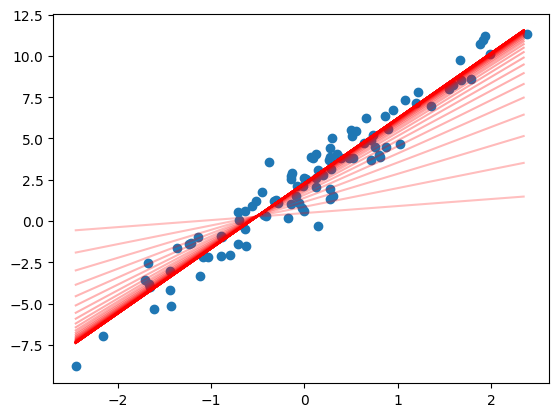

In [2]:
class Linear(nn.Module):
    features: int
    use_bias: bool

    def setup(self):
        self.linear = nn.Dense(features=self.features, use_bias=self.use_bias)

    def __call__(self, x):
        return self.linear(x)
    
n, d = 100, 1
lr = 1e-1
key = jax.random.PRNGKey(0)

model = Linear(features=1, use_bias=True)
params = model.init(key, jnp.ones((1, d)))
print(params)
print(jax.tree_util.tree_map(jnp.shape, params))

key1, key2 = jax.random.split(key)
x = jax.random.normal(key1, (n, d))
y = 4 * x + jax.random.normal(key2, (n, d)) + 2

xs = jnp.arange(jnp.min(x), jnp.max(x), 0.1)
ys = xs * params['params']['linear']['kernel'] + params['params']['linear']['bias']
plt.plot(x, y, 'o')

loss_fn = lambda params, x, y: jnp.mean(jnp.square(model.apply(params, x) - y))
grad_fn = jax.value_and_grad(loss_fn)


for idx in range(50):
    loss, gradients = grad_fn(params, x, y)
    params = jax.tree_util.tree_map(lambda p, g: p - lr * g, params, gradients)
    slope, intercept = params['params']['linear']['kernel'], params['params']['linear']['bias']
    print(loss, slope, intercept)
    plt.plot(xs, (slope * xs + intercept).reshape(-1), 'r', alpha=0.25 + idx / 100)